In [1]:
# Importing Libraries
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# Setting display option to show all columns and values
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
house_price = pd.read_csv("train.csv")

## Data Exploration

In [3]:
house_price.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
house_price[['LotFrontage','LotArea','MasVnrArea','TotalBsmtSF','YearBuilt','YearRemodAdd',
             '1stFlrSF','2ndFlrSF','GrLivArea','GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF','SalePrice']].corr()

LotFrontage   LotArea  MasVnrArea  TotalBsmtSF  YearBuilt  \
LotFrontage      1.000000  0.426095    0.193458     0.392075   0.123349   
LotArea          0.426095  1.000000    0.104160     0.260833   0.014228   
MasVnrArea       0.193458  0.104160    1.000000     0.363936   0.315707   
TotalBsmtSF      0.392075  0.260833    0.363936     1.000000   0.391452   
YearBuilt        0.123349  0.014228    0.315707     0.391452   1.000000   
YearRemodAdd     0.088866  0.013788    0.179618     0.291066   0.592855   
1stFlrSF         0.457181  0.299475    0.344501     0.819530   0.281986   
2ndFlrSF         0.080177  0.050986    0.174561    -0.174512   0.010308   
GrLivArea        0.402797  0.263116    0.390857     0.454868   0.199010   
GarageYrBlt      0.070250 -0.024947    0.252691     0.322445   0.825667   
GarageArea       0.344997  0.180403    0.373066     0.486665   0.478954   
WoodDeckSF       0.088521  0.171698    0.159718     0.232019   0.224880   
OpenPorchSF      0.151972  0.084774    0.125703     0.247264   0.188686   
SalePrice        0.351799  0.263843    0.477493     0.613581   0.522897   

              YearRemodAdd  1stFlrSF  2ndFlrSF  GrLivArea  GarageYrBlt  \
LotFrontage       0.088866  0.457181  0.080177   0.402797     0.070250   
LotArea           0.013788  0.299475  0.050986   0.263116    -0.024947   
MasVnrArea        0.179618  0.344501  0.174561   0.390857     0.252691   
TotalBsmtSF       0.291066  0.819530 -0.174512   0.454868     0.322445   
YearBuilt         0.592855  0.281986  0.010308   0.199010     0.825667   
YearRemodAdd      1.000000  0.240379  0.140024   0.287389     0.642277   
1stFlrSF          0.240379  1.000000 -0.202646   0.566024     0.233449   
2ndFlrSF          0.140024 -0.202646  1.000000   0.687501     0.070832   
GrLivArea         0.287389  0.566024  0.687501   1.000000     0.231197   
GarageYrBlt       0.642277  0.233449  0.070832   0.231197     1.000000   
GarageArea        0.371600  0.489782  0.138347   0.468997     0.564567   
WoodDeckSF        0.205726  0.235459  0.092165   0.247433     0.224577   
OpenPorchSF       0.226298  0.211671  0.208026   0.330224     0.228425   
SalePrice         0.507101  0.605852  0.319334   0.708624     0.486362   

              GarageArea  WoodDeckSF  OpenPorchSF  SalePrice  
LotFrontage     0.344997    0.088521     0.151972   0.351799  
LotArea         0.180403    0.171698     0.084774   0.263843  
MasVnrArea      0.373066    0.159718     0.125703   0.477493  
TotalBsmtSF     0.486665    0.232019     0.247264   0.613581  
YearBuilt       0.478954    0.224880     0.188686   0.522897  
YearRemodAdd    0.371600    0.205726     0.226298   0.507101  
1stFlrSF        0.489782    0.235459     0.211671   0.605852  
2ndFlrSF        0.138347    0.092165     0.208026   0.319334  
GrLivArea       0.468997    0.247433     0.330224   0.708624  
GarageYrBlt     0.564567    0.224577     0.228425   0.486362  
GarageArea      1.000000    0.224666     0.241435   0.623431  
WoodDeckSF      0.224666    1.000000     0.058661   0.324413  
OpenPorchSF     0.241435    0.058661     1.000000   0.315856  
SalePrice       0.623431    0.324413     0.315856   1.000000

In [5]:
house_price.shape

(1460, 81)

In [6]:
house_price.describe(percentiles=[0.25,0.50,0.75,0.99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
99%    1445.410000   190.000000   141.000000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
99%       9.000000  2009.000000   2009.000000   791.920000  1572.410000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
99%     830.380000  1797.050000  2155.050000  2219.460000  1418.920000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
99%      360.000000  3123.480000      2.000000      1.000000     3.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
99%       1.000000      5.000000      2.000000     11.000000     2.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   

In [7]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
# Checking for duplicate entries
sum(house_price.duplicated())

0

### Data Visualization

In [9]:
# % of missing values column wise
round(house_price.isna().sum() / len(house_price.index) * 100 ,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [10]:
# Missing values in most of the columns means facility not available.
# Some columns have more than 80% missing values. Even if we impute them the column will be highly skewed.
# only 4 houses have pool. And its not sufficient for prediction.
# Thus deleting such columns
house_price.drop(['MiscFeature','PoolQC','Alley','PoolArea','Fence','MiscVal'],1,inplace=True)

### Data Cleaning - Null value handling, Outlier Treatment

In [11]:
house_price['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [12]:
#Street: Type of road access to property
house_price['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [13]:
# Street column is highly skewed. Thus dropping this column.
house_price.drop('Street',1,inplace=True)

### Lot Features

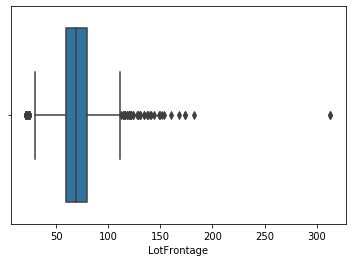

In [14]:
#LotFrontage: Linear feet of street connected to property
# 17% missing values
sns.boxplot(house_price['LotFrontage'])
# LotFrontage has 17% missing values. 
# Imputing with median
house_price['LotFrontage'].fillna(house_price['LotFrontage'].median(),inplace=True)
# Outlier Treatment
house_price = house_price[house_price['LotFrontage']<160]

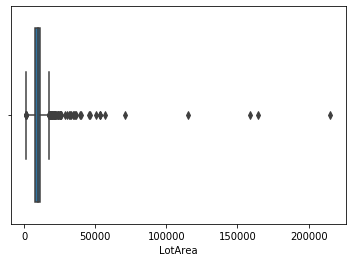

In [15]:
#LotArea: Lot size in square feet
sns.boxplot(house_price['LotArea'])
# outlier treatment - removing houses with lot area more than 70,000 
house_price = house_price[house_price['LotArea']<70000]

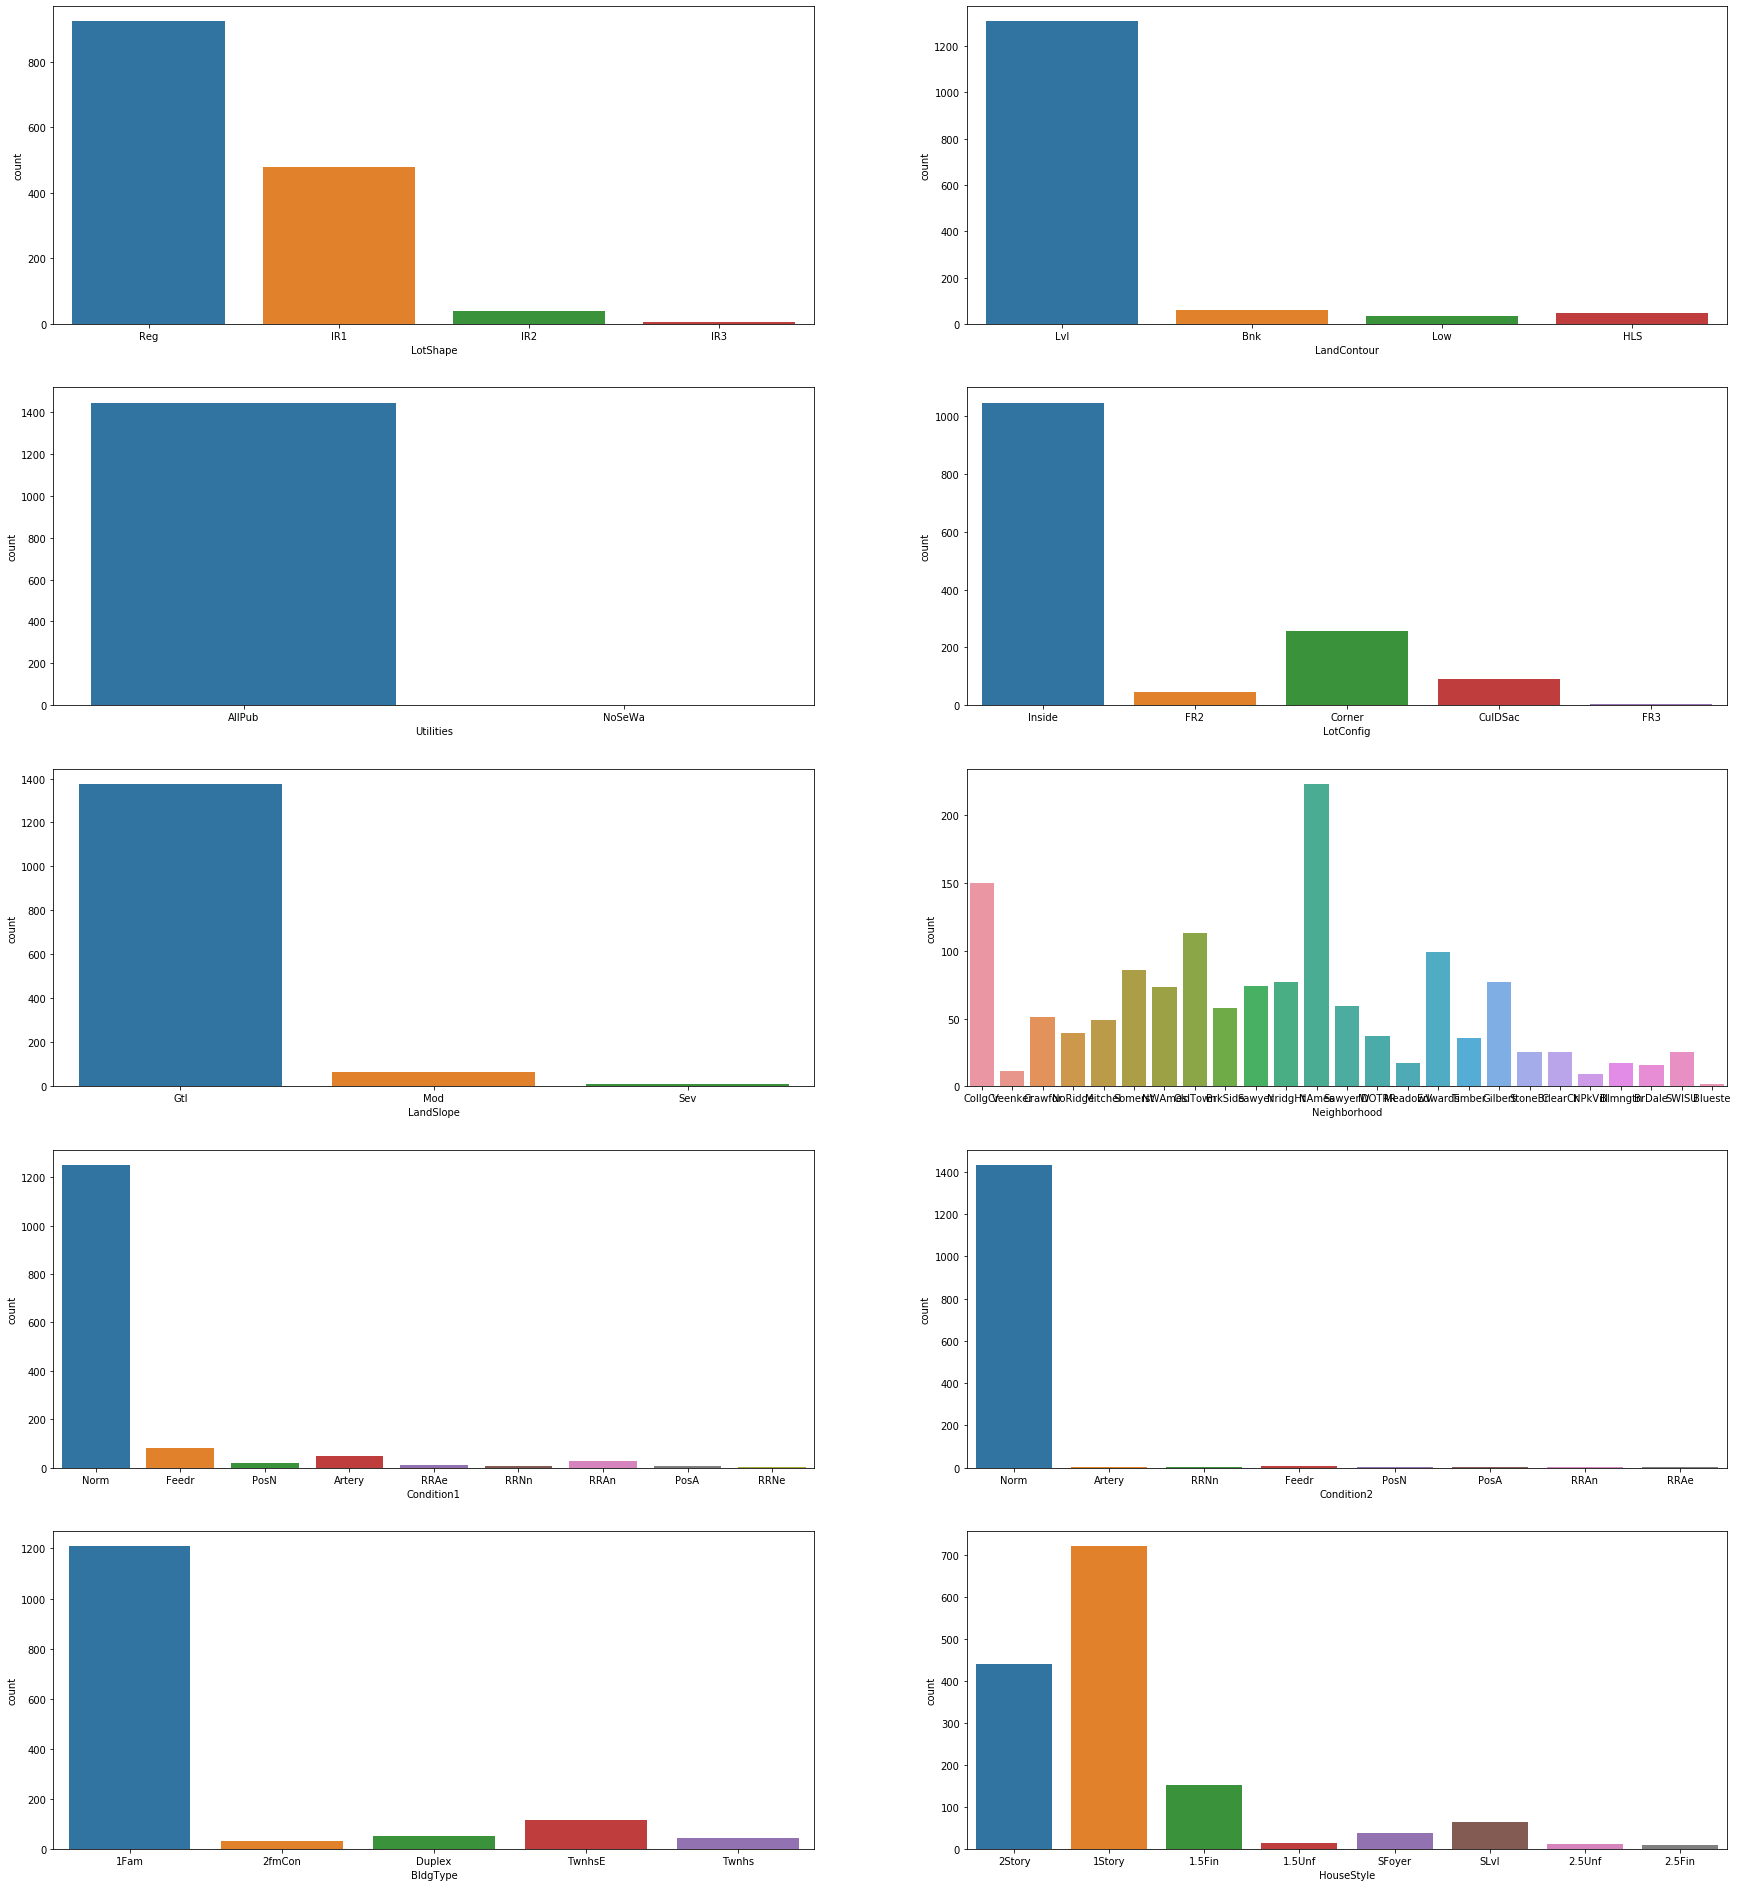

In [16]:
cat = ['LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle']

# Visualising Categorical Data

plt.figure(figsize=(30, 90))
i = 0
for colName in cat :
    plt.subplot(13,2,i+1)
    sns.countplot(x = colName, data = house_price)
    i+=1

plt.show()

In [17]:
for col in cat:
    print(col)
    print(house_price[col].value_counts())

LotShape
Reg    924
IR1    480
IR2     38
IR3      6
Name: LotShape, dtype: int64
LandContour
Lvl    1307
Bnk      62
HLS      47
Low      32
Name: LandContour, dtype: int64
Utilities
AllPub    1447
NoSeWa       1
Name: Utilities, dtype: int64
LotConfig
Inside     1048
Corner      258
CulDSac      91
FR2          47
FR3           4
Name: LotConfig, dtype: int64
LandSlope
Gtl    1376
Mod      63
Sev       9
Name: LandSlope, dtype: int64
Neighborhood
NAmes      223
CollgCr    150
OldTown    113
Edwards     99
Somerst     86
Gilbert     77
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     39
IDOTRR      37
Timber      36
ClearCr     25
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Condition1
Norm      1251
Feedr       80
Artery      47
RRAn        26
PosN        19
RRAe        11
PosA         7
RRNn         5
RRNe    

In [18]:
# some of the category levels have less data point ant will not be sufficient in prediction. 
# Either removing such levels or combining in one level.
house_price['Neighborhood'].replace(to_replace=['NPkVill','Veenker','Blueste'], value='Other',inplace=True)
house_price['LotConfig'].replace(to_replace=['FR2','FR3'],value="FR2+3",inplace=True)
house_price['Condition1'].replace(to_replace=['PosA''RRNn','RRNe'], value = 'Other',inplace=True)
house_price['HouseStyle'].replace(to_replace=['1.5Unf','2.5Unf','2.5Fin'],value='Unf',inplace=True)

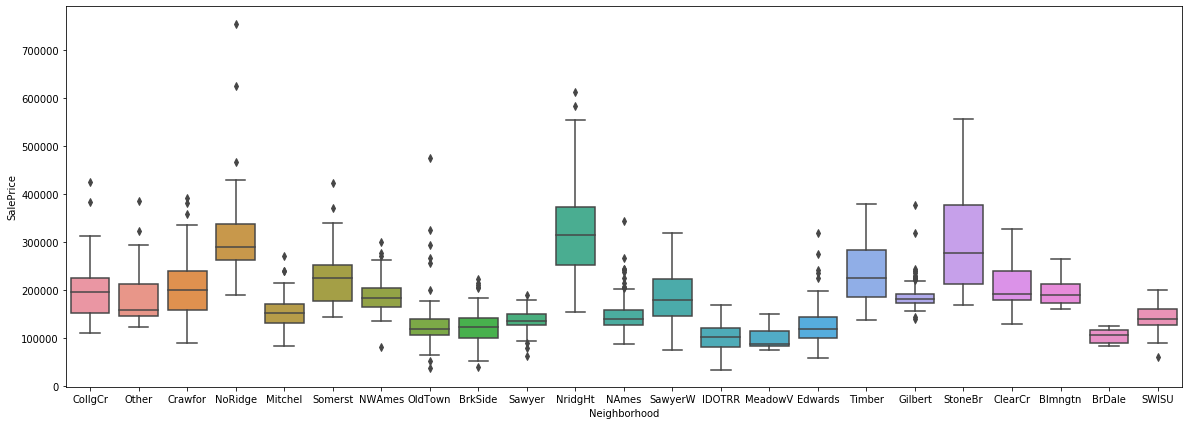

In [19]:
plt.figure(figsize=(20,7))
sns.boxplot(x='Neighborhood',y='SalePrice',data=house_price)

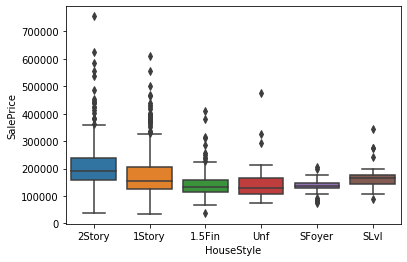

In [20]:
sns.boxplot(x='HouseStyle',y='SalePrice',data=house_price)

In [21]:
# As we can observer from above visualizations most f the categories are skewed. And wont help in prediction.
# Some categories are showing redundant inform,ation. Dropping such categories
# 'Housestyle' and 'BldgType' are giving same information as 'MSSubClass'
house_price.drop(['Utilities','LandSlope','Condition2','MSSubClass'],1,inplace=True)

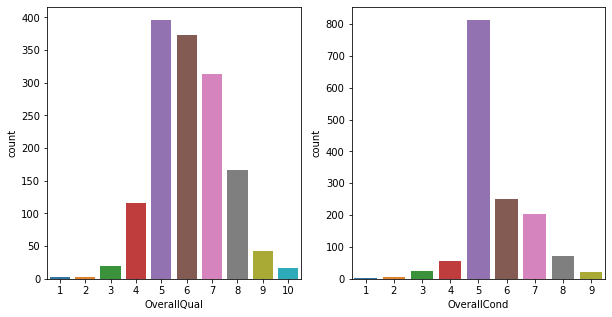

In [22]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='OverallQual', data= house_price)
plt.subplot(1,2,2)
sns.countplot(x='OverallCond', data= house_price)

In [23]:
# Creating columns 'huse_age' and 'remodel_age'
house_price['House_age'] = house_price['YrSold']-house_price['YearBuilt']
house_price['Remodel_age'] = house_price['YrSold']-house_price['YearRemodAdd']
house_price[['YearBuilt','YrSold','House_age','YearRemodAdd','Remodel_age']]

YearBuilt  YrSold  House_age  YearRemodAdd  Remodel_age
0          2003    2008          5          2003            5
1          1976    2007         31          1976           31
2          2001    2008          7          2002            6
3          1915    2006         91          1970           36
4          2000    2008          8          2000            8
5          1993    2009         16          1995           14
6          2004    2007          3          2005            2
7          1973    2009         36          1973           36
8          1931    2008         77          1950           58
9          1939    2008         69          1950           58
10         1965    2008         43          1965           43
11         2005    2006          1          2006            0
12         1962    2008         46          1962           46
13         2006    2007          1          2007            0
14         1960    2008         48          1960           48
15         1929    2007         78          2001            6
16         1970    2010         40          1970           40
17         1967    2006         39          1967           39
18         2004    2008          4          2004            4
19         1958    2009         51          1965           44
20         2005    2006          1          2006            0
21         1930    2007         77          1950           57
22         2002    2008          6          2002            6
23         1976    2007         31          1976           31
24         1968    2010         42          2001            9
25         2007    2009          2          2007            2
26         1951    2010         59          2000           10
27         2007    2010          3          2008            2
28         1957    2006         49          1997            9
29         1927    2008         81          1950           58
30         1920    2008         88          1950           58
31         1966    2008         42          2006            2
32         2007    2008          1          2007            1
33         1959    2010         51          1959           51
34         2005    2007          2          2005            2
35         2004    2006          2          2005            1
36         1994    2009         15          1995           14
37         1954    2009         55          1990           19
38         1953    2010         57          2007            3
39         1955    2008         53          1955           53
40         1965    2006         41          1965           41
41         1959    2007         48          1959           48
42         1983    2007         24          1983           24
43         1975    2008         33          1980           28
44         1959    2006         47          1959           47
45         2005    2010          5          2005            5
46         2003    2009          6          2003            6
47         2006    2007          1          2006            1
48         1920    2009         89          2008            1
49         1966    2007         41          1966           41
50         1997    2007         10          1997           10
51         1934    2006         72          1950           56
52         1963    2010         47          1963           47
53         1981    2006         25          1987           19
54         1955    2007         52          1955           52
55         1964    2008         44          1964           44
56         1999    2009         10          2000            9
57         2004    2006          2          2004            2
58         2006    2006          0          2006            0
59         1972    2008         36          1972           36
60         2004    2006          2          2004            2
61         1920    2007         87          1996           11
62         2006    2007          1          2006            1
63         1921    2010         89    

In [24]:
# dropping columns
house_price.drop(['YearBuilt','YearRemodAdd'],1,inplace=True)

In [25]:
house_price['RoofStyle'].value_counts()
house_price['RoofStyle'].replace(to_replace=['Mansard','Shed'],value='Other',inplace=True)
house_price['RoofMatl'].value_counts()
#'RoofMatl' is highly skewd. Thus dropping this column
house_price.drop('RoofMatl',1,inplace=True)

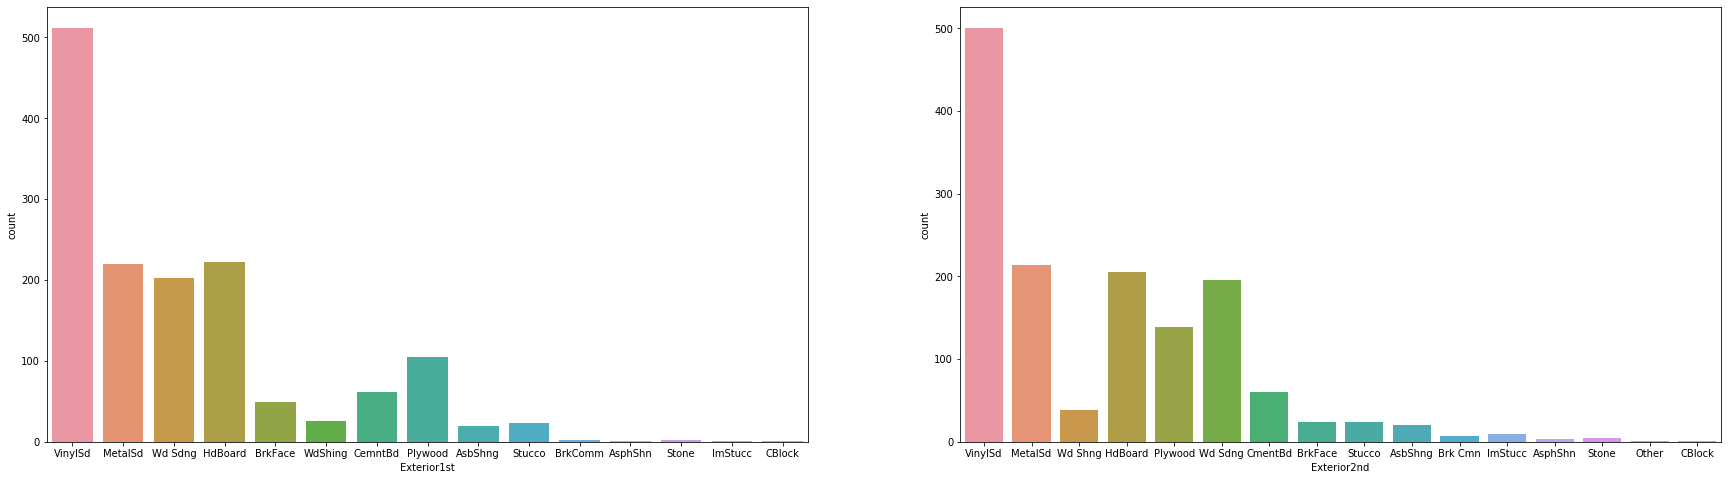

In [26]:
plt.figure(figsize=(30,8))
plt.subplot(1,2,1)
sns.countplot(x='Exterior1st', data= house_price)
plt.subplot(1,2,2)
sns.countplot(x='Exterior2nd', data= house_price)

In [27]:
# exterior1st and Exterior2nd are showing similar trends. Thus dropping Exterior2nd
# combining levels with low data points
house_price['Exterior1st'].replace(to_replace=['BrkComm','AsphShn','Stone','ImStucc','CBlock'],value="Other",inplace=True)
house_price.drop('Exterior2nd',1,inplace=True)

None       856
BrkFace    444
Stone      126
BrkCmn      14
Name: MasVnrType, dtype: int64


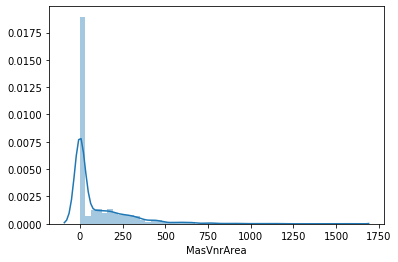

In [28]:
# MasVnrType: Masonry veneer type (0.55% missing values)
print(house_price['MasVnrType'].value_counts())
# Removing null values from 'MasVnrType'
house_price = house_price[~pd.isnull(house_price['MasVnrType'])]
sns.distplot(house_price['MasVnrArea'])

In [29]:
# ExterQual and ExterCond. Converting them to Numeric categorical variable.
house_price['ExterQual']=house_price['ExterQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})
house_price['ExterCond']=house_price['ExterCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})

In [30]:
# Checking cotrrelations
(house_price[['ExterQual','ExterCond','SalePrice']]).corr()

ExterQual  ExterCond  SalePrice
ExterQual   1.000000   0.009862   0.696498
ExterCond   0.009862   1.000000   0.022561
SalePrice   0.696498   0.022561   1.000000

In [31]:
print(house_price['Foundation'].value_counts())
house_price['Foundation'].replace(to_replace=['Stone','Wood'], value='Other',inplace=True)

PConc     633
CBlock    628
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64


### Basement Features - NA in basements features means 'No_Basement'

In [32]:
# Imputing Na with 'NA'(str)
#house_price[['BsmtQual','BsmtCond']].fillna('NB',inplace=True)
# Converting 'BsmtQual' and 'BsmtCond' into numeric columns
#house_price['BsmtQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0})
#house_price['BsmtCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0})

In [33]:
# Imputing Na with 'NB'(No Basement)
house_price['BsmtQual'].fillna('NB',inplace=True)
house_price['BsmtCond'].fillna('NB',inplace=True)
# Converting 'BsmtQual' and 'BsmtCond' into numeric columns
house_price['BsmtQual']=house_price['BsmtQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NB':0})
house_price['BsmtCond']=house_price['BsmtCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NB':0})

In [34]:
# Checking cotrrelations
print((house_price[['BsmtQual','SalePrice','BsmtCond']]).corr())
# 'BsmtQual' and 'BsmtCond' are highly correlated. 
house_price.drop('BsmtCond',1,inplace=True)

           BsmtQual  SalePrice  BsmtCond
BsmtQual   1.000000   0.588170  0.633812
SalePrice  0.588170   1.000000  0.211528
BsmtCond   0.633812   0.211528  1.000000


In [35]:
house_price['BsmtExposure'].value_counts()

No    943
Av    219
Gd    126
Mn    114
Name: BsmtExposure, dtype: int64

In [36]:
# Where 'BsmtQual' = 0, that mens 'No Basement'. apply same rule for 'BsmtExposure'
for i,val in enumerate(house_price.BsmtQual):
    if val is 0:
        house_price.BsmtExposure[i]= 'NB'

In [37]:
# removing missing data points
house_price = house_price[~pd.isnull(house_price['BsmtExposure'])]

In [38]:
# BsmtFinType1 - Rating of basement finished area
house_price.BsmtFinType1.fillna('NB', inplace=True)

In [39]:
# converting into numeric ratings
house_price['BsmtFinType1']=house_price['BsmtFinType1'].map({'GLQ':5, 'ALQ':4, 'BLQ':3 , 'Rec':2, 'LwQ':1, 'Unf':0, 'NB': -1})

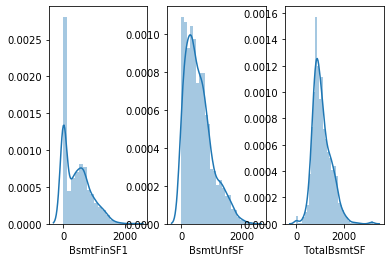

In [40]:
plt.subplot(1,3,1)
sns.distplot(house_price['BsmtFinSF1'])
plt.subplot(1,3,2)
sns.distplot(house_price.BsmtUnfSF)
plt.subplot(1,3,3)
sns.distplot(house_price.TotalBsmtSF)

In [41]:
# BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF = TotalBsmtSF
# kepping all the four columns, creates redundancy in the dataset.
# checking for correlations
print(house_price[['TotalBsmtSF','BsmtUnfSF','SalePrice']].corr())
# TotalBsmtSF is highly correalted to Saleprice. 
# Dropping unnecesary columns.
house_price.drop(['BsmtFinType2','BsmtFinSF2','BsmtUnfSF','BsmtFinSF1'],1,inplace=True)

             TotalBsmtSF  BsmtUnfSF  SalePrice
TotalBsmtSF     1.000000   0.414730   0.643086
BsmtUnfSF       0.414730   1.000000   0.206958
SalePrice       0.643086   0.206958   1.000000


### Heating Feature

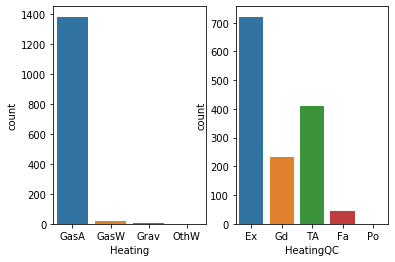

In [42]:
# Heating: Type of heating
plt.subplot(1,2,1)
sns.countplot(x='Heating', data=house_price)
plt.subplot(1,2,2)
sns.countplot(x='HeatingQC', data=house_price)
# data is highly skewed for type of Heating column. Thus deleting this column.
house_price.drop('Heating',1,inplace=True)

In [43]:
# quality of heating has lot 0f variance. Converting it into numeric column
house_price['HeatingQC']=house_price['HeatingQC'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})

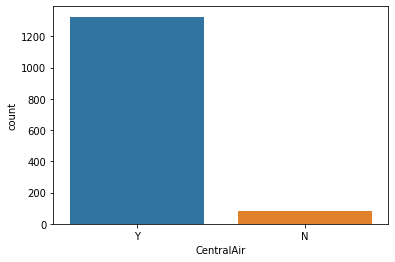

In [44]:
# CentralAir: Central air conditioning
sns.countplot(x='CentralAir', data=house_price)

In [45]:
# Electrical: Electrical system
print(house_price['Electrical'].value_counts())
# Reducing number og levels.
house_price['Electrical'].replace(to_replace=['FuseF','FuseP','Mix'], value='FuseFPMix', inplace=True)
# removing null value
house_price= house_price[~pd.isnull(house_price['Electrical'])]
#house_price = house_price[~pd.isnull(house_price['BsmtExposure'])]

SBrkr    1293
FuseA      89
FuseF      22
FuseP       3
Mix         1
Name: Electrical, dtype: int64


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

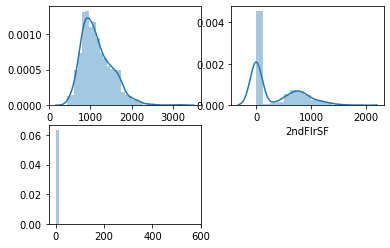

In [46]:
#1stFlrSF: First Floor square feet
#2ndFlrSF: Second floor square feet
plt.subplot(2,2,1)
sns.distplot(house_price['1stFlrSF'])
plt.subplot(2,2,2)
sns.distplot(house_price['2ndFlrSF'])
plt.subplot(2,2,3)
sns.distplot(house_price['LowQualFinSF'])
plt.subplot(2,2,4)
sns.distplot(house_price['GrLivArea'])

In [ ]:
# 'LowQualFinSF' is highly skewed. Dropping this column.
house_price.drop('LowQualFinSF',1, inplace=True)

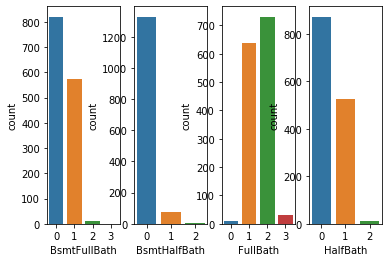

In [47]:
#BsmtFullBath: Basement full bathrooms
#BsmtHalfBath: Basement half bathrooms
plt.subplot(1,4,1)
sns.countplot(x='BsmtFullBath', data= house_price)
plt.subplot(1,4,2)
sns.countplot(x='BsmtHalfBath', data= house_price)
plt.subplot(1,4,3)
sns.countplot(x='FullBath', data= house_price)
plt.subplot(1,4,4)
sns.countplot(x='HalfBath', data= house_price)

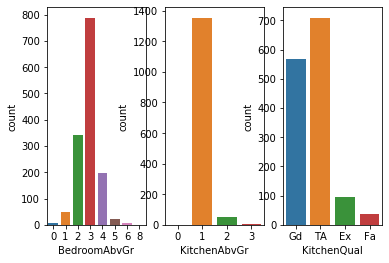

In [48]:
# Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
# Kitchen: Kitchens above grade
# KitchenQual: Kitchen quality
plt.subplot(1,3,1)
sns.countplot(x='BedroomAbvGr', data= house_price)
plt.subplot(1,3,2)
sns.countplot(x='KitchenAbvGr', data= house_price)
plt.subplot(1,3,3)
sns.countplot(x='KitchenQual', data= house_price)


In [49]:
# converting KitchenQual to numeric col
house_price.KitchenQual=house_price.KitchenQual.map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})

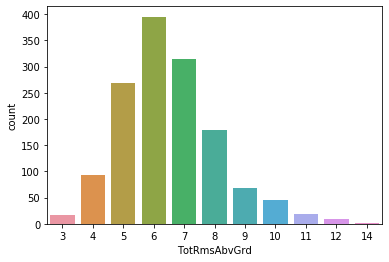

In [50]:
#TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
sns.countplot(x='TotRmsAbvGrd', data= house_price)

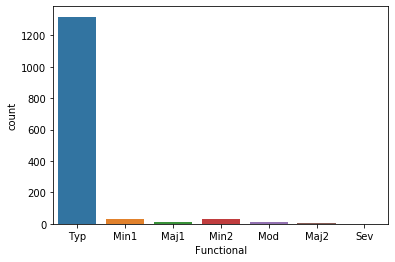

In [51]:
#Functional: Home functionality (Assume typical unless deductions are warranted)
house_price.Functional.value_counts()
sns.countplot(x='Functional', data= house_price)
# Column is highly skewed. Thus deleting this column
house_price.drop('Functional',1,inplace=True)

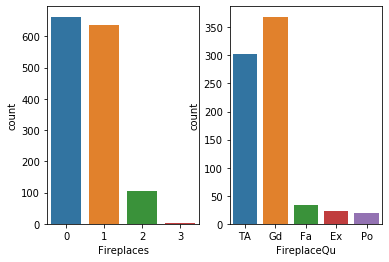

In [52]:
#Fireplaces: Number of fireplaces - 47% of houses have no fireplace
# FireplaceQu: Fireplace quality - 47% data is missing
plt.subplot(1,2,1)
sns.countplot(x='Fireplaces', data= house_price)
plt.subplot(1,2,2)
sns.countplot(x='FireplaceQu', data= house_price)

In [53]:
#Filling null values with 0 - which means no fireplace
house_price['FireplaceQu'].fillna(0, inplace=True)

In [54]:
house_price['FireplaceQu'].isna().sum()

0

In [55]:
#Converting fireplaceQu into numeric. 
house_price['FireplaceQu']=house_price['FireplaceQu'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 0:0})

GarageType        5.33
GarageYrBlt       5.33
GarageFinish      5.33
GarageCars        0.00
GarageArea        0.00
GarageQual        5.33
GarageCond        5.33

In [56]:
#GarageType: Garage location -> 5.33% missing values
house_price['GarageType'].fillna('No_Garage', inplace=True)
house_price['GarageType'].replace(to_replace=['CarPort','2Types'], value= 'CarPort+2Types',inplace=True)

In [57]:
house_price['GarageType'].value_counts()

Attchd            845
Detchd            371
BuiltIn            84
No_Garage          75
Basment            19
CarPort+2Types     14
Name: GarageType, dtype: int64

In [58]:
#GarageYrBlt: Year garage was built
# imputing null values with 0.
house_price['GarageYrBlt'].fillna(0, inplace=True)

In [59]:
# GarageFinish: Interior finish of the garage
print(house_price['GarageFinish'].value_counts())
house_price['GarageFinish'].fillna('No_Garage', inplace=True)

Unf    582
RFn    412
Fin    339
Name: GarageFinish, dtype: int64


In [60]:
# GarageCars: Size of garage in car capacity
# GarageArea: Size of garage in square feet
house_price[['GarageCars','GarageArea','SalePrice']].corr()

GarageCars  GarageArea  SalePrice
GarageCars    1.000000    0.887065   0.645832
GarageArea    0.887065    1.000000   0.631258
SalePrice     0.645832    0.631258   1.000000

In [61]:
# We can see high correaltion among 'GarageCars','GarageArea','SalePrice'
# Thus dropping 'GarageCars' as 'GarageArea' is more intuitive
house_price.drop('GarageCars',1,inplace=True)

In [62]:
# GarageQual: Garage quality
# GarageCond: Garage condition
house_price['GarageQual'].fillna('NG', inplace=True)
house_price['GarageCond'].fillna('NG', inplace=True)


In [63]:
house_price['GarageCond'].value_counts()

TA    1282
NG      75
Fa      33
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [64]:
# Converting into numeric columns
house_price['GarageQual']=house_price['GarageQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NG':0})
house_price['GarageCond']=house_price['GarageCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NG':0})

In [65]:
# PavedDrive: Paved driveway
house_price['PavedDrive'].value_counts()

Y    1297
N      82
P      29
Name: PavedDrive, dtype: int64

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

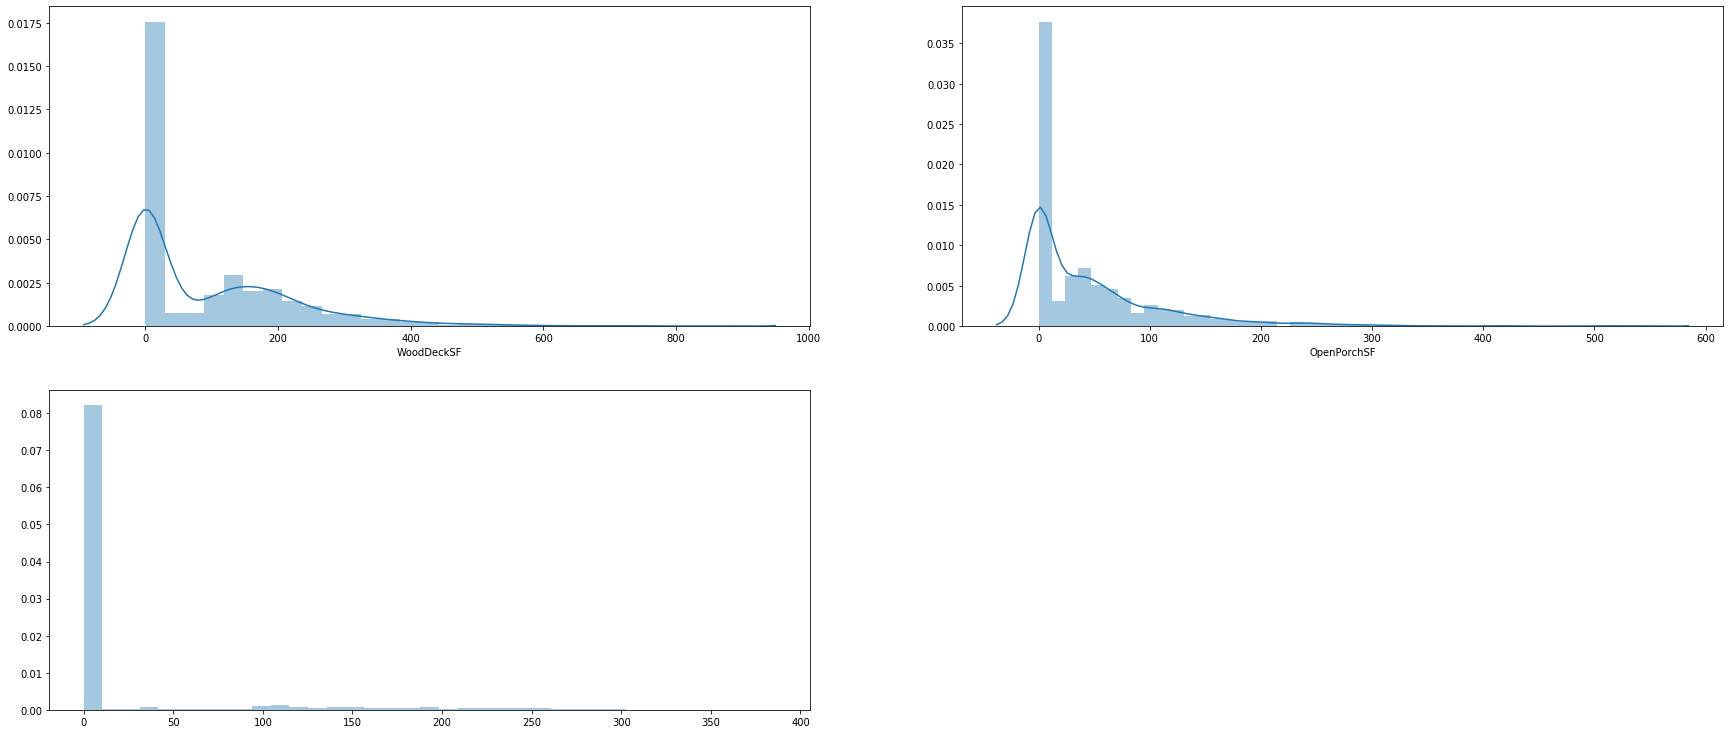

In [66]:
# WoodDeckSF: Wood deck area in square feet
num = ['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']

plt.figure(figsize=(30, 20))
i = 0
for col in num :
    plt.subplot(3,2,i+1)
    sns.distplot(house_price[col])
    i+=1

plt.show()
    

In [ ]:
house_price[['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','SalePrice']].corr()

In [ ]:
# columns 'EnclosedPorch', '3SsnPorch','ScreenPorch' are highly skewed. also have very low correlation with 'SalePrice'
# thus deleting these clumns
house_price.drop(['EnclosedPorch', '3SsnPorch','ScreenPorch'],1,inplace=True)

In [67]:
# as we have created new columns 'House_age', dropping cols 'MoSold', 'YrSold'
house_price.drop(['MoSold', 'YrSold'],1,inplace=True)

In [68]:
# SaleType: Type of sale
house_price['SaleType'].value_counts()

WD       1222
New       117
COD        42
ConLD       8
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [69]:
house_price['SaleType'].replace(to_replace=['ConLD','ConLI','ConLw','CWD','Oth','Con'],value='Other',inplace=True)

In [70]:
# SaleCondition: Condition of sale
house_price['SaleCondition'].value_counts()

Normal     1158
Partial     120
Abnorml      98
Family       19
Alloca        9
AdjLand       4
Name: SaleCondition, dtype: int64

In [71]:
house_price['SaleCondition'].replace(to_replace=['Alloca','AdjLand'],value='Other',inplace=True)

In [72]:
house_price.shape

(1408, 58)

In [73]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1408 entries, 0 to 1459
Data columns (total 58 columns):
Id               1408 non-null int64
MSZoning         1408 non-null object
LotFrontage      1408 non-null float64
LotArea          1408 non-null int64
LotShape         1408 non-null object
LandContour      1408 non-null object
LotConfig        1408 non-null object
Neighborhood     1408 non-null object
Condition1       1408 non-null object
BldgType         1408 non-null object
HouseStyle       1408 non-null object
OverallQual      1408 non-null int64
OverallCond      1408 non-null int64
RoofStyle        1408 non-null object
Exterior1st      1408 non-null object
MasVnrType       1408 non-null object
MasVnrArea       1408 non-null float64
ExterQual        1408 non-null int64
ExterCond        1408 non-null int64
Foundation       1408 non-null object
BsmtQual         1408 non-null int64
BsmtExposure     1408 non-null object
BsmtFinType1     1408 non-null int64
TotalBsmtSF      1408 non

### Dividing Data into Categorical and Numeric Variables

In [74]:
# getting numeric variables in 1 df
numeric = house_price.select_dtypes(include = ['int64', 'float64'])

In [75]:
numeric.head()

Id  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  ExterQual  \
0   1         65.0     8450            7            5       196.0          4   
1   2         80.0     9600            6            8         0.0          3   
2   3         68.0    11250            7            5       162.0          4   
3   4         60.0     9550            7            5         0.0          3   
4   5         84.0    14260            8            5       350.0          4   

   ExterCond  BsmtQual  BsmtFinType1  TotalBsmtSF  HeatingQC  1stFlrSF  \
0          3         4             5          856          5       856   
1          3         4             4         1262          5      1262   
2          3         4             5          920          5       920   
3          3         3             4          756          4       961   
4          3         4             5         1145          5      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         1             3             1            4             8   
1         0             3             1            3             6   
2         1             3             1            4             6   
3         0             3             1            4             7   
4         1             4             1            4             9   

   Fireplaces  FireplaceQu  GarageYrBlt  GarageArea  GarageQual  GarageCond  \
0           0            0       2003.0         548           3           3   
1           1            3       1976.0         460           3           3   
2           1            3       2001.0         608           3           3   
3           1            4       1998.0         642           3           3   
4           1            3       2000.0         836           3           3   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  SalePrice  \
0           0           61              0          0            0     208500   
1         298            0              0          0            0     181500   
2           0           42              0          0            0     223500   
3           0           35            272          0            0     140000   
4         192           84              0          0            0     250000   

   House_age  Remodel_age  
0          5            5  
1         31           31  
2          7            6  
3         91           36  
4          8            8

In [76]:
# getting categorical variables in 1 df
categorical = house_price.select_dtypes(include = ['object'])

In [77]:
categorical.head()

MSZoning LotShape LandContour LotConfig Neighborhood Condition1 BldgType  \
0       RL      Reg         Lvl    Inside      CollgCr       Norm     1Fam   
1       RL      Reg         Lvl     FR2+3        Other      Feedr     1Fam   
2       RL      IR1         Lvl    Inside      CollgCr       Norm     1Fam   
3       RL      IR1         Lvl    Corner      Crawfor       Norm     1Fam   
4       RL      IR1         Lvl     FR2+3      NoRidge       Norm     1Fam   

  HouseStyle RoofStyle Exterior1st MasVnrType Foundation BsmtExposure  \
0     2Story     Gable     VinylSd    BrkFace      PConc           No   
1     1Story     Gable     MetalSd       None     CBlock           Gd   
2     2Story     Gable     VinylSd    BrkFace      PConc           Mn   
3     2Story     Gable     Wd Sdng       None     BrkTil           No   
4     2Story     Gable     VinylSd    BrkFace      PConc           Av   

  CentralAir Electrical GarageType GarageFinish PavedDrive SaleType  \
0          Y      SBrkr     Attchd          RFn          Y       WD   
1          Y      SBrkr     Attchd          RFn          Y       WD   
2          Y      SBrkr     Attchd          RFn          Y       WD   
3          Y      SBrkr     Detchd          Unf          Y       WD   
4          Y      SBrkr     Attchd          RFn          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal

### Data Preparation

In [78]:
# Defining the map function
house_price['CentralAir']=house_price['CentralAir'].map({'Y':1,'N':0})

In [79]:
# Convert into dummies
categorical_dummies = pd.get_dummies(categorical.drop('CentralAir',1))
categorical_dummies.head()

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                 0            0            0            1            0   
1                 0            0            0            1            0   
2                 0            0            0            1            0   
3                 0            0            0            1            0   
4                 0            0            0            1            0   

   LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_Bnk  \
0             0             0             0             1                0   
1             0             0             0             1                0   
2             1             0             0             0                0   
3             1             0             0             0                0   
4             1             0             0             0                0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_Corner  \
0                0                0                1                 0   
1                0                0                1                 0   
2                0                0                1                 0   
3                0                0                1                 1   
4                0                0                1                 0   

   LotConfig_CulDSac  LotConfig_FR2+3  LotConfig_Inside  Neighborhood_Blmngtn  \
0                  0                0                 1                     0   
1                  0                1                 0                     0   
2                  0                0                 1                     0   
3                  0                0                 0                     0   
4                  0                1                 0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
0                     1                     0                     0   
1                     0                     0                     0   
2                     1                     0                     0   
3                     0                     1                     0   
4                     0                     0                     0   

   Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NWAmes  \
0                     0                   0                    0   
1                     0                   0                    0   
2                     0                   0                    0   
3                     0                   0                    0   
4                     0                   0                    0   

   Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     1                     0                     0   

   Neighborhood_Other  Neighborhood_SWISU  Nei

In [80]:
# deleting the levels which have least data
categorical_dummies.drop(['MSZoning_C (all)','LotShape_IR3','LandContour_Low','LotConfig_FR2+3','Neighborhood_Other','Condition1_Other','BldgType_2fmCon','HouseStyle_Unf','RoofStyle_Other','Exterior1st_Other','MasVnrType_BrkCmn','Foundation_Other','BsmtExposure_NB','Electrical_FuseFPMix','GarageType_CarPort+2Types','GarageFinish_No_Garage','PavedDrive_P','SaleCondition_Other','SaleType_Other'],1,inplace=True)

In [81]:
categorical.columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'MasVnrType', 'Foundation', 'BsmtExposure', 'CentralAir', 'Electrical',
       'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [82]:
# Dropping columns for which dummy variables are created
house_price.drop(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'MasVnrType', 'Foundation', 'BsmtExposure', 'Electrical',
       'GarageType', 'GarageFinish', 'PavedDrive','SaleType','SaleCondition'],1,inplace=True)

In [83]:
# Concatenate dummy variables with  house_price
house_price = pd.concat([house_price, categorical_dummies], axis=1)

In [84]:
corr_df = house_price.drop('SalePrice',1)

In [85]:
# Concatenate dummy variables with  house_price
corr_df = pd.concat([corr_df,house_price['SalePrice']], axis=1)

In [86]:
corr_df.head()

Id  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  ExterQual  \
0   1         65.0     8450            7            5       196.0          4   
1   2         80.0     9600            6            8         0.0          3   
2   3         68.0    11250            7            5       162.0          4   
3   4         60.0     9550            7            5         0.0          3   
4   5         84.0    14260            8            5       350.0          4   

   ExterCond  BsmtQual  BsmtFinType1  TotalBsmtSF  HeatingQC  CentralAir  \
0          3         4             5          856          5           1   
1          3         4             4         1262          5           1   
2          3         4             5          920          5           1   
3          3         3             4          756          4           1   
4          3         4             5         1145          5           1   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1            4             8   
1         2         0             3             1            3             6   
2         2         1             3             1            4             6   
3         1         0             3             1            4             7   
4         2         1             4             1            4             9   

   Fireplaces  FireplaceQu  GarageYrBlt  GarageArea  GarageQual  GarageCond  \
0           0            0       2003.0         548           3           3   
1           1            3       1976.0         460           3           3   
2           1            3       2001.0         608           3           3   
3           1            4       1998.0         642           3           3   
4           1            3       2000.0         836           3           3   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  House_age  \
0           0           61              0          0            0          5   
1         298            0              0          0            0         31   
2           0           42              0          0            0          7   
3           0           35            272          0            0         91   
4         192           84              0          0            0          8   

   Remodel_age  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0            5            0            0            1            0   
1           31            0            0            1            0   
2            6            0            0            1            0   
3           36            0            0            1            0   
4            8            0            0            1            0   

   LotShape_IR1  LotShape_IR2  LotShape_Reg  LandContour_Bnk  LandContour_HLS  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             1             0             0                0                0   
3             1             0             0                0                0   
4             1             0             0                0                0   

   LandContour_Lvl  LotConfig_Corner  LotConfig_CulDSac  LotConfig_Inside  \
0                1                 0                  0                 1   
1                1                 0                  0                 0   
2                1  

### Final Dataset after EDA

In [87]:
# Final dataset with 1408 rows and 123 features
corr_df.shape

(1408, 135)

In [88]:
corr_df.head()

Id  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  ExterQual  \
0   1         65.0     8450            7            5       196.0          4   
1   2         80.0     9600            6            8         0.0          3   
2   3         68.0    11250            7            5       162.0          4   
3   4         60.0     9550            7            5         0.0          3   
4   5         84.0    14260            8            5       350.0          4   

   ExterCond  BsmtQual  BsmtFinType1  TotalBsmtSF  HeatingQC  CentralAir  \
0          3         4             5          856          5           1   
1          3         4             4         1262          5           1   
2          3         4             5          920          5           1   
3          3         3             4          756          4           1   
4          3         4             5         1145          5           1   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1            4             8   
1         2         0             3             1            3             6   
2         2         1             3             1            4             6   
3         1         0             3             1            4             7   
4         2         1             4             1            4             9   

   Fireplaces  FireplaceQu  GarageYrBlt  GarageArea  GarageQual  GarageCond  \
0           0            0       2003.0         548           3           3   
1           1            3       1976.0         460           3           3   
2           1            3       2001.0         608           3           3   
3           1            4       1998.0         642           3           3   
4           1            3       2000.0         836           3           3   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  House_age  \
0           0           61              0          0            0          5   
1         298            0              0          0            0         31   
2           0           42              0          0            0          7   
3           0           35            272          0            0         91   
4         192           84              0          0            0          8   

   Remodel_age  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0            5            0            0            1            0   
1           31            0            0            1            0   
2            6            0            0            1            0   
3           36            0            0            1            0   
4            8            0            0            1            0   

   LotShape_IR1  LotShape_IR2  LotShape_Reg  LandContour_Bnk  LandContour_HLS  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             1             0             0                0                0   
3             1             0             0                0                0   
4             1             0             0                0                0   

   LandContour_Lvl  LotConfig_Corner  LotConfig_CulDSac  LotConfig_Inside  \
0                1                 0                  0                 1   
1                1                 0                  0                 0   
2                1  

### Checking for correlation

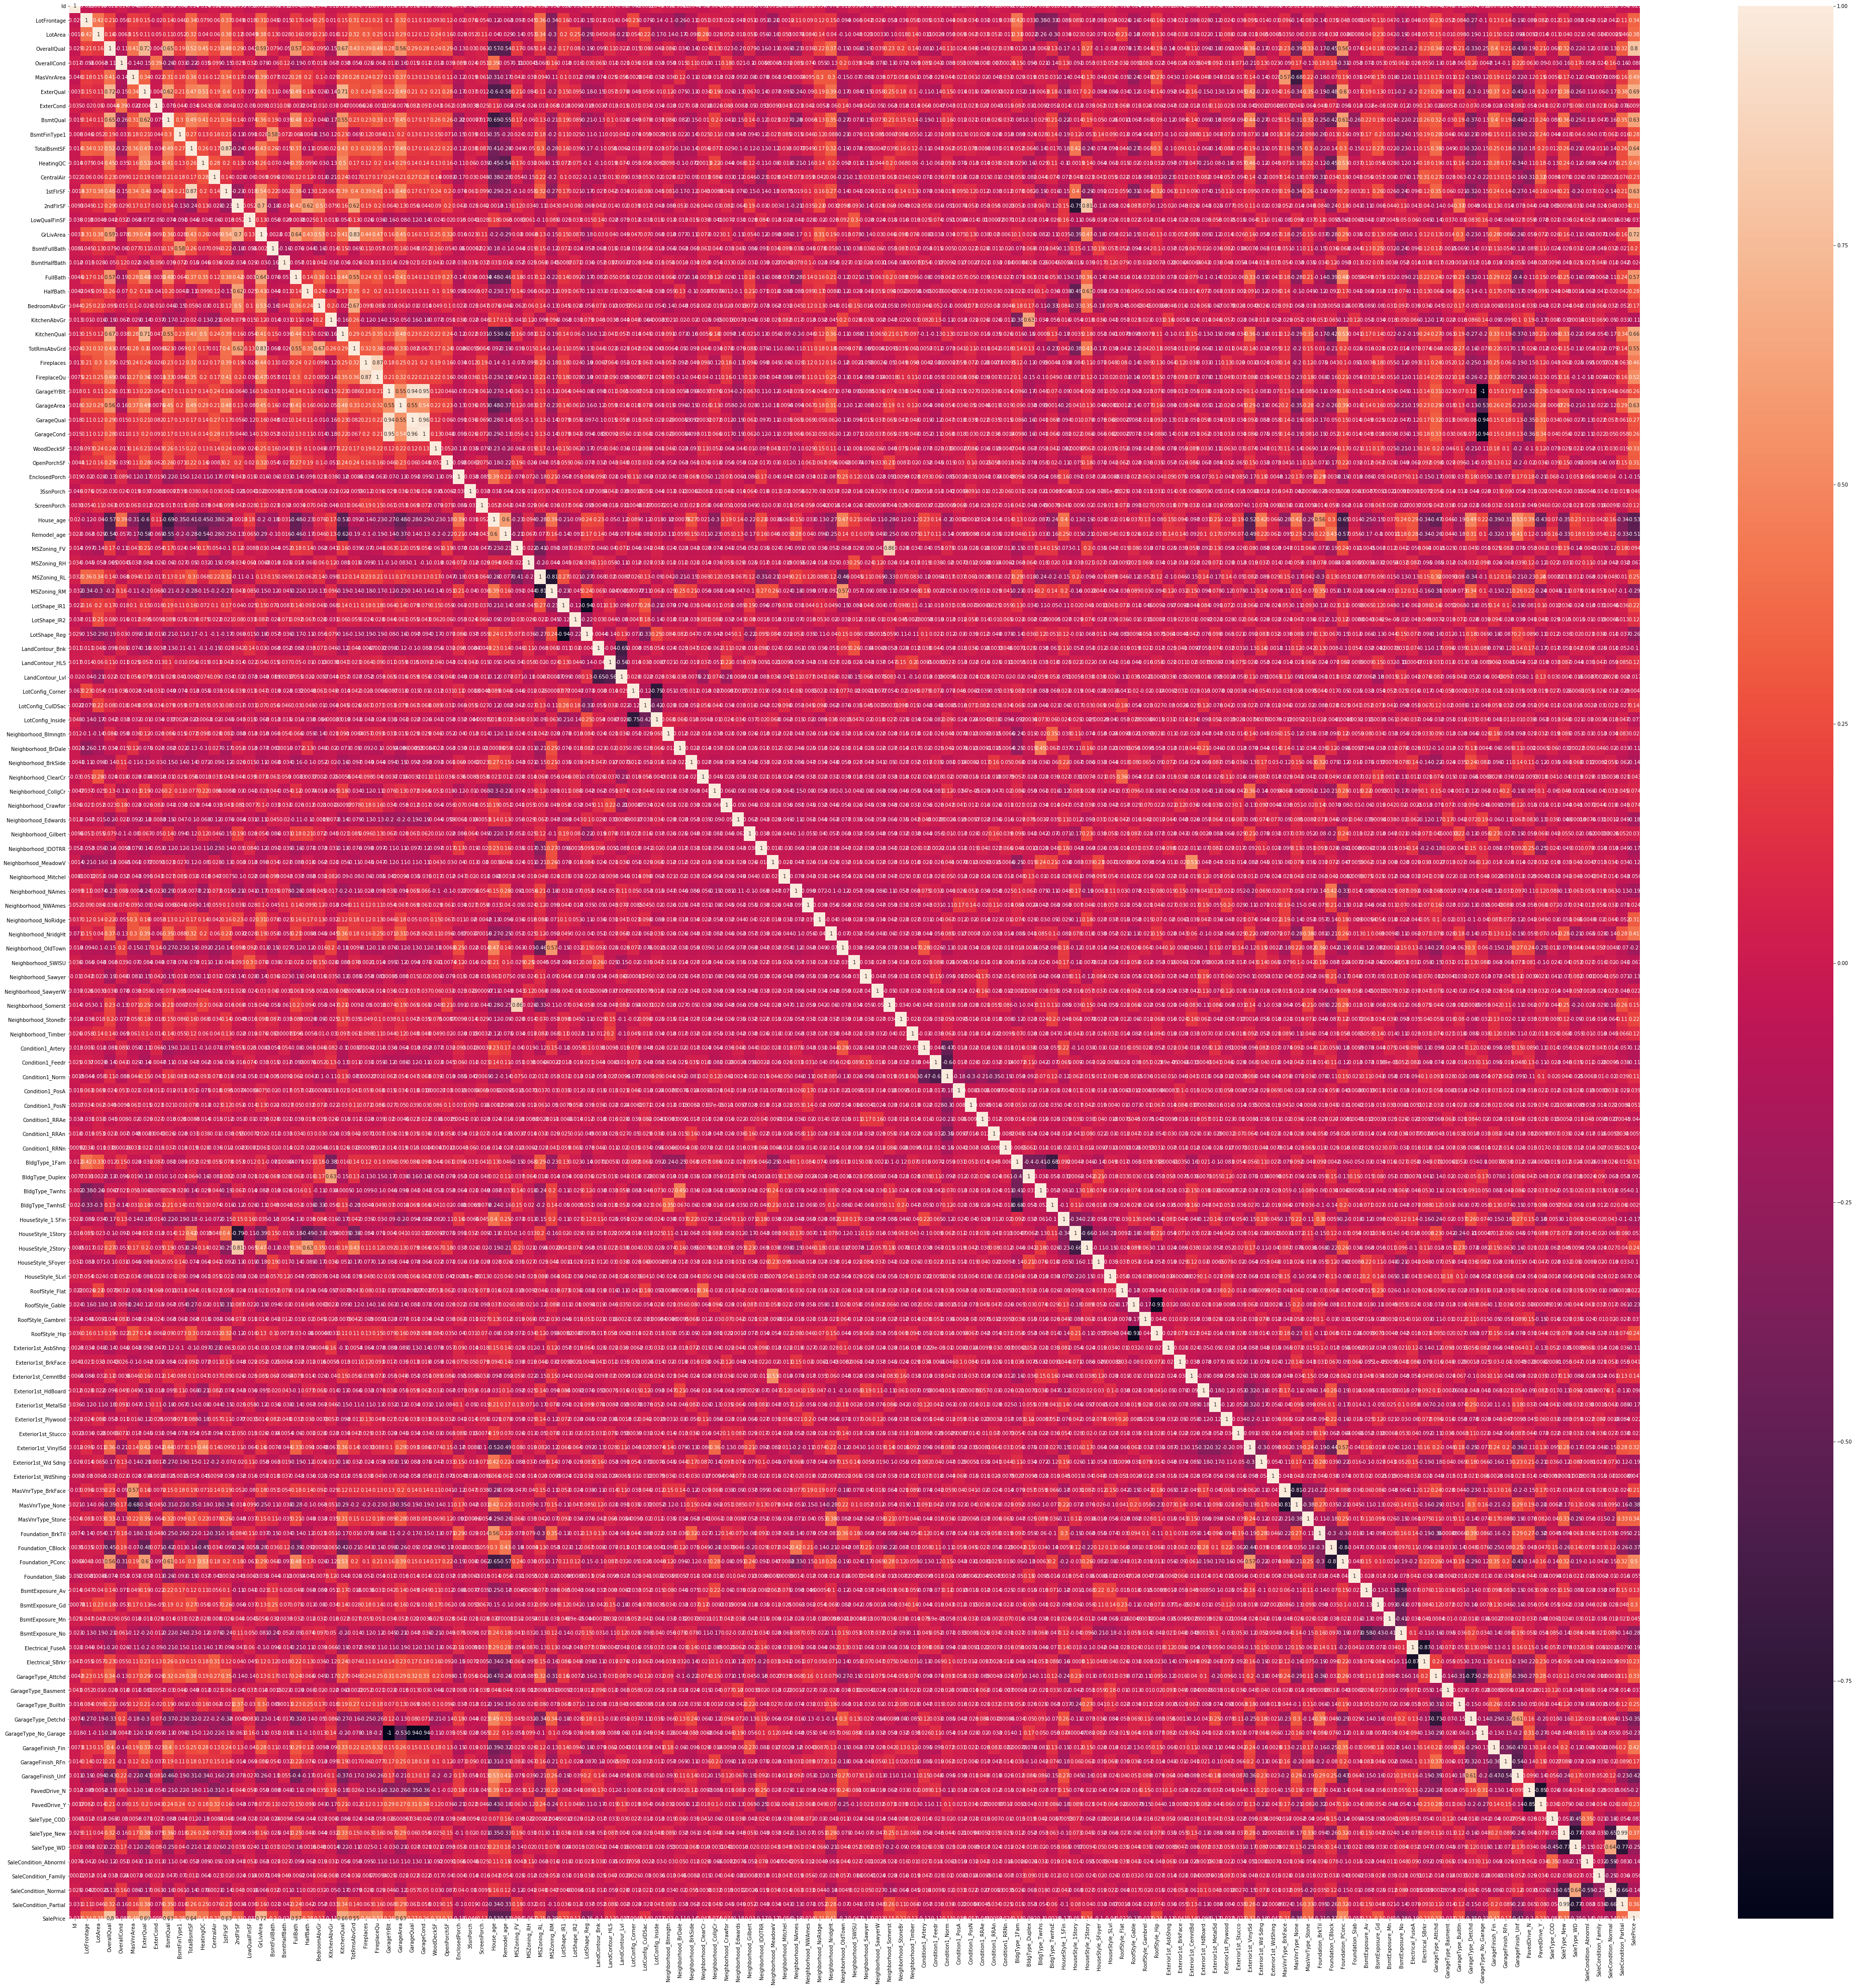

In [89]:
# Let's see the correlation matrix 
plt.figure(figsize = (70,70))        # Size of the figure
sns.heatmap(corr_df.corr(),annot = True)
plt.show()

We can see there are many features which are highly correlated. Dropping the feature with correlation more than 0.7.

In [90]:
# 'GrLivArea' is highly correlated to 'TotRmsAbvGrd'
# 'GarageYrBlt' is highly correlated to 'GarageQual' and 'GarageCond'
corr_df.drop(['TotRmsAbvGrd','GarageYrBlt','GarageQual','GarageType_No_Garage','PavedDrive_N','Electrical_FuseA','GarageType_Detchd','Foundation_CBlock','RoofStyle_Gambrel','MSZoning_RL','2ndFlrSF','SaleType_WD'],1,inplace=True)

In [91]:
corr_df.shape

(1408, 123)

### Dividing into X and y

In [92]:
# Putting independent variables in X
X = corr_df.drop(['SalePrice'],axis=1)
X.head()

Id  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  ExterQual  \
0   1         65.0     8450            7            5       196.0          4   
1   2         80.0     9600            6            8         0.0          3   
2   3         68.0    11250            7            5       162.0          4   
3   4         60.0     9550            7            5         0.0          3   
4   5         84.0    14260            8            5       350.0          4   

   ExterCond  BsmtQual  BsmtFinType1  TotalBsmtSF  HeatingQC  CentralAir  \
0          3         4             5          856          5           1   
1          3         4             4         1262          5           1   
2          3         4             5          920          5           1   
3          3         3             4          756          4           1   
4          3         4             5         1145          5           1   

   1stFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       856             0       1710             1             0         2   
1      1262             0       1262             0             1         2   
2       920             0       1786             1             0         2   
3       961             0       1717             1             0         1   
4      1145             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  Fireplaces  FireplaceQu  \
0         1             3             1            4           0            0   
1         0             3             1            3           1            3   
2         1             3             1            4           1            3   
3         0             3             1            4           1            4   
4         1             4             1            4           1            3   

   GarageArea  GarageCond  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         548           3           0           61              0          0   
1         460           3         298            0              0          0   
2         608           3           0           42              0          0   
3         642           3           0           35            272          0   
4         836           3         192           84              0          0   

   ScreenPorch  House_age  Remodel_age  MSZoning_FV  MSZoning_RH  MSZoning_RM  \
0            0          5            5            0            0            0   
1            0         31           31            0            0            0   
2            0          7            6            0            0            0   
3            0         91           36            0            0            0   
4            0          8            8            0            0            0   

   LotShape_IR1  LotShape_IR2  LotShape_Reg  LandContour_Bnk  LandContour_HLS  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             1             0             0                0                0   
3             1             0             0                0                0   
4             1             0             0                0                0   

   LandContour_Lvl  LotConfig_Corner  LotConfig_CulDSac  LotConfig_Inside  \
0                1                 0                  0                 1   
1                1                 0                  0                 0   
2                1                 0                  0                 1   
3                1                 1                  0                 0   
4                1                 0                  0                 0   

   Neighborhood_Blmngtn  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0       

In [93]:
# Getting dependent variable in y
y = corr_df['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

### Scaling the Features

In [94]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtFinType1',
       ...
       'GarageFinish_Fin', 'GarageFinish_RFn', 'GarageFinish_Unf',
       'PavedDrive_Y', 'SaleType_COD', 'SaleType_New', 'SaleCondition_Abnorml',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=122)

In [95]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [96]:
X_train.shape

(985, 122)

## Model Building and Evaluation

### Multiple Linear Regression Model - Using All the Parameters

In [97]:
# Importing Libraries
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [98]:
# MLR
# linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict
print("R2 for Training Set")
y_train_pred = lm.predict(X_train)
r2_score(y_true=y_train, y_pred=y_train_pred)

R2 for Training Set


0.8914832786209264

In [99]:
# R-squared on the test set
print("R2 for Test set")
y_test_pred = lm.predict(X_test)
r2_score(y_true=y_test, y_pred=y_test_pred)

R2 for Test set


0.8981881777739621

In [100]:
lm.coef_

array([-1.06280922e+02, -7.29547070e+02,  2.42652669e+03,  1.16539764e+04,
        7.86580643e+03,  4.46545864e+03,  4.13824066e+03, -1.55199396e+03,
        2.93265276e+03,  3.09405551e+03,  8.65096323e+03, -2.04768301e+02,
        3.82383463e+02, -6.53936407e+03, -1.33155454e+03,  3.16586922e+04,
        3.18572590e+03,  1.74044146e+03,  1.11285329e+03,  1.44718001e+03,
       -2.21089962e+03, -3.95415573e+03,  4.27782793e+03,  6.34199832e+03,
       -3.81684725e+03,  4.92419483e+03,  2.14903611e+03,  1.41416449e+03,
       -1.35717331e+02,  8.12784289e+02,  1.48188230e+03,  2.31260415e+03,
       -6.14798404e+03,  5.27763127e+02,  4.25664981e+02,  6.25827243e+02,
       -3.59031286e+02, -2.93224702e+03, -1.94467654e+02, -1.06368094e+03,
        7.11703970e+02,  3.33808695e+03,  4.06030653e+03,  3.68529404e+03,
        3.80335820e+03,  3.58156307e+03, -1.59339870e+03,  8.10839289e+01,
       -2.22824947e+03, -2.38664044e+03, -4.90796179e+03,  3.60749920e+02,
       -7.09465912e+03, -

In [101]:
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 180681.429),
 ('Id', -106.281),
 ('LotFrontage', -729.547),
 ('LotArea', 2426.527),
 ('OverallQual', 11653.976),
 ('OverallCond', 7865.806),
 ('MasVnrArea', 4465.459),
 ('ExterQual', 4138.241),
 ('ExterCond', -1551.994),
 ('BsmtQual', 2932.653),
 ('BsmtFinType1', 3094.056),
 ('TotalBsmtSF', 8650.963),
 ('HeatingQC', -204.768),
 ('CentralAir', 382.383),
 ('1stFlrSF', -6539.364),
 ('LowQualFinSF', -1331.555),
 ('GrLivArea', 31658.692),
 ('BsmtFullBath', 3185.726),
 ('BsmtHalfBath', 1740.441),
 ('FullBath', 1112.853),
 ('HalfBath', 1447.18),
 ('BedroomAbvGr', -2210.9),
 ('KitchenAbvGr', -3954.156),
 ('KitchenQual', 4277.828),
 ('Fireplaces', 6341.998),
 ('FireplaceQu', -3816.847),
 ('GarageArea', 4924.195),
 ('GarageCond', 2149.036),
 ('WoodDeckSF', 1414.164),
 ('OpenPorchSF', -135.717),
 ('EnclosedPorch', 812.784),
 ('3SsnPorch', 1481.882),
 ('ScreenPorch', 2312.604),
 ('House_age', -6147.984),
 ('Remodel_age', 527.763),
 ('MSZoning_FV', 425.665),
 ('MSZoning_RH', 625.827),

## Advanced Regression Models

### Lasso

In [102]:
# grid search CV

# set up cross validation scheme
folds = 5

# specify range of hyperparameters
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000,1500 ]}

# grid search
# lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:   11.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000, 1500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [103]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.145321      0.058967         0.001189        0.000106      0.0001   
1       0.121592      0.007581         0.001183        0.000075       0.001   
2       0.118640      0.007151         0.001162        0.000045        0.01   
3       0.121044      0.008078         0.001188        0.000058        0.05   
4       0.120074      0.006134         0.001239        0.000201         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.660876           0.835797           0.848465   
1   {'alpha': 0.001}           0.660876           0.835797           0.848465   
2    {'alpha': 0.01}           0.660878           0.835797           0.848468   
3    {'alpha': 0.05}           0.660885           0.835798           0.848479   
4     {'alpha': 0.1}           0.660893           0.835799           0.848494   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.860288           0.903813         0.821848        0.083679   
1           0.860289           0.903813         0.821848        0.083679   
2           0.860291           0.903815         0.821850        0.083679   
3           0.860302           0.903822         0.821857        0.083680   
4           0.860316           0.903831         0.821867        0.083681   

   rank_test_score  split0_train_score  split1_train_score  \
0               29            0.926387            0.897223   
1               28            0.926387            0.897223   
2               27            0.926387            0.897223   
3               26            0.926387            0.897223   
4               25            0.926387            0.897223   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.894701            0.890056            0.882141   
1            0.894701            0.890056            0.882141   
2            0.894701            0.890056            0.882141   
3            0.894701            0.890056            0.882141   
4            0.894701            0.890056            0.882141   

   mean_train_score  std_train_score  
0          0.898101         0.015046  
1          0.898101         0.015046  
2          0.898101         0.015046  
3          0.898101         0.015046  
4          0.898101         0.015046

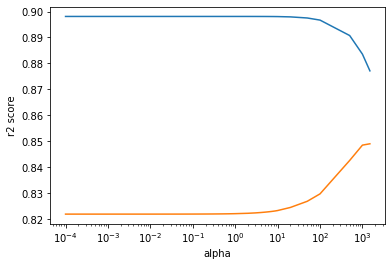

In [104]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [105]:
# model with optimal alpha
# lasso regression
lasso = Lasso(alpha=1000)
lasso.fit(X_train, y_train)

# predict
y_train_pred = lasso.predict(X_train)
print('R-squared on Training Dataset')
print(r2_score(y_true=y_train, y_pred=y_train_pred))
print('R-squared on Test dataset')
y_test_pred = lasso.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

R-squared on Training Dataset
0.8785525774780005
R-squared on Test dataset
0.8878242118884371


###### Lasso Regression (alpha  -> 1000)
###### R2 fot Training data - 87%
###### We have got a pretty good model with - 
##### R2 for Test Data = 88% on unseen dataset  Using Lasso Regression

In [106]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 180693.348),
 ('Id', -0.0),
 ('LotFrontage', 0.0),
 ('LotArea', 2115.122),
 ('OverallQual', 13908.009),
 ('OverallCond', 4939.858),
 ('MasVnrArea', 3316.397),
 ('ExterQual', 5478.721),
 ('ExterCond', -0.0),
 ('BsmtQual', 2987.634),
 ('BsmtFinType1', 2313.298),
 ('TotalBsmtSF', 8337.288),
 ('HeatingQC', 68.05),
 ('CentralAir', 0.0),
 ('1stFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 22170.35),
 ('BsmtFullBath', 2892.09),
 ('BsmtHalfBath', 244.47),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -699.615),
 ('KitchenQual', 4344.515),
 ('Fireplaces', 3258.9),
 ('FireplaceQu', 0.0),
 ('GarageArea', 4703.179),
 ('GarageCond', -0.0),
 ('WoodDeckSF', 851.21),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', -0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 1646.549),
 ('House_age', -4283.77),
 ('Remodel_age', -640.243),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RM', -1340.486),
 ('LotShape_IR1', -0.0),
 ('LotShape_IR2', 22.559),
 (

In [107]:
columns=pd.Series(cols)

In [108]:
type(columns)

pandas.core.series.Series

In [109]:
features=columns.to_frame()

In [110]:
features.columns = ['Features']

In [111]:
weight = pd.Series(model_parameters)

In [112]:
features['Weight'] = weight

### Features and value of coefficients By Lasso

In [113]:
features

Features      Weight
0                 constant  180693.348
1                       Id      -0.000
2              LotFrontage       0.000
3                  LotArea    2115.122
4              OverallQual   13908.009
5              OverallCond    4939.858
6               MasVnrArea    3316.397
7                ExterQual    5478.721
8                ExterCond      -0.000
9                 BsmtQual    2987.634
10            BsmtFinType1    2313.298
11             TotalBsmtSF    8337.288
12               HeatingQC      68.050
13              CentralAir       0.000
14                1stFlrSF       0.000
15            LowQualFinSF      -0.000
16               GrLivArea   22170.350
17            BsmtFullBath    2892.090
18            BsmtHalfBath     244.470
19                FullBath       0.000
20                HalfBath       0.000
21            BedroomAbvGr      -0.000
22            KitchenAbvGr    -699.615
23             KitchenQual    4344.515
24              Fireplaces    3258.900
25             FireplaceQu       0.000
26              GarageArea    4703.179
27              GarageCond      -0.000
28              WoodDeckSF     851.210
29             OpenPorchSF       0.000
30           EnclosedPorch      -0.000
31               3SsnPorch       0.000
32             ScreenPorch    1646.549
33               House_age   -4283.770
34             Remodel_age    -640.243
35             MSZoning_FV       0.000
36             MSZoning_RH       0.000
37             MSZoning_RM   -1340.486
38            LotShape_IR1      -0.000
39            LotShape_IR2      22.559
40            LotShape_Reg       0.000
41         LandContour_Bnk    -261.558
42         LandContour_HLS     308.480
43         LandContour_Lvl       0.000
44        LotConfig_Corner      -0.000
45       LotConfig_CulDSac     345.409
46        LotConfig_Inside      -0.000
47    Neighborhood_Blmngtn      -0.000
48     Neighborhood_BrDale       0.000
49    Neighborhood_BrkSide     264.582
50    Neighborhood_ClearCr       0.000
51    Neighborhood_CollgCr       0.000
52    Neighborhood_Crawfor    3126.643
53    Neighborhood_Edwards    -762.244
54    Neighborhood_Gilbert      -0.000
55     Neighborhood_IDOTRR      -0.000
56    Neighborhood_MeadowV      -0.000
57    Neighborhood_Mitchel      -0.000
58      Neighborhood_NAmes      -3.737
59     Neighborhood_NWAmes    -310.054
60    Neighborhood_NoRidge    4627.214
61    Neighborhood_NridgHt    8601.734
62    Neighborhood_OldTown    -384.321
63      Neighborhood_SWISU      -0.000
64     Neighborhood_Sawyer       0.000
65    Neighborhood_SawyerW       0.000
66    Neighborhood_Somerst    2431.585
67    Neighborhood_StoneBr    3108.216
68     Neighborhood_Timber      -0.000
69       Condition1_Artery      -0.000
70        Condition1_Feedr      -0.000
71         Condition1_Norm     854.436
72         Condition1_PosA       0.000
73         Condition1_PosN   -1213.468
74         Condition1_RRAe    -378.932
75         Condition1_RRAn       0.000
76         Condition1_RRNn       0.000
77           BldgType_1Fam    4839.933
78         BldgType_Duplex      -0.000
79          BldgType_Twnhs    -387.980
80         BldgType_TwnhsE      -0.000
81       HouseStyle_1.5Fin      -0.000
82       HouseStyle_1Story       0.000
83       HouseStyle_2Story      -0.000
84       HouseStyle_SFoyer      -0.000
85         HouseStyle_SLvl      -0.000
86          RoofStyle_Flat       0.000
87         RoofStyle_Gable    -413.744
88           RoofStyle_Hip       0.000
89     Exterior1st_AsbShng      -0.000
90     Exterior1st_BrkFace    1283.625
91     Exterior1st_CemntBd       0.000
92     Exterior1st_HdBoard      -0.000
93     Exterior1st_MetalSd       0.000
94     Exterior1st_Plywood     -59.391
95      Exterior1st_Stucco       0.000
96     Exterior1st_VinylSd       0.000
97     Exterior1st_Wd Sdng      -0.000
98     Exterior1st_WdShing       0.000
99      MasVnrType_BrkFace    -255.473
100        MasVnrType_None       0.000
101       MasVnrType_Stone     431.055
1

### Final Selected Features by Lasso

In [114]:
len(features[features['Weight']!=0])

57

### Out of 117 features, Lasso selected 54 features

In [115]:
features[features['Weight']!=0].sort_values(by= 'Weight', ascending=False)

Features      Weight
0                 constant  180693.348
16               GrLivArea   22170.350
4              OverallQual   13908.009
61    Neighborhood_NridgHt    8601.734
11             TotalBsmtSF    8337.288
106        BsmtExposure_Gd    5699.349
7                ExterQual    5478.721
5              OverallCond    4939.858
77           BldgType_1Fam    4839.933
26              GarageArea    4703.179
60    Neighborhood_NoRidge    4627.214
118           SaleType_New    4364.504
23             KitchenQual    4344.515
6               MasVnrArea    3316.397
24              Fireplaces    3258.900
52    Neighborhood_Crawfor    3126.643
67    Neighborhood_StoneBr    3108.216
9                 BsmtQual    2987.634
17            BsmtFullBath    2892.090
66    Neighborhood_Somerst    2431.585
10            BsmtFinType1    2313.298
113       GarageFinish_Fin    2121.773
3                  LotArea    2115.122
32             ScreenPorch    1646.549
90     Exterior1st_BrkFace    1283.625
71         Condition1_Norm     854.436
28              WoodDeckSF     851.210
104        Foundation_Slab     779.167
101       MasVnrType_Stone     431.055
103       Foundation_PConc     353.969
45       LotConfig_CulDSac     345.409
42         LandContour_HLS     308.480
49    Neighborhood_BrkSide     264.582
18            BsmtHalfBath     244.470
122  SaleCondition_Partial      68.746
12               HeatingQC      68.050
39            LotShape_IR2      22.559
58      Neighborhood_NAmes      -3.737
94     Exterior1st_Plywood     -59.391
99      MasVnrType_BrkFace    -255.473
41         LandContour_Bnk    -261.558
102      Foundation_BrkTil    -304.204
59     Neighborhood_NWAmes    -310.054
74         Condition1_RRAe    -378.932
62    Neighborhood_OldTown    -384.321
79          BldgType_Twnhs    -387.980
87         RoofStyle_Gable    -413.744
34             Remodel_age    -640.243
22            KitchenAbvGr    -699.615
53    Neighborhood_Edwards    -762.244
120   SaleCondition_Family    -776.784
73         Condition1_PosN   -1213.468
37             MSZoning_RM   -1340.486
111     GarageType_Basment   -1423.493
119  SaleCondition_Abnorml   -2017.536
108        BsmtExposure_No   -2732.565
33               House_age   -4283.770

### Ridge Regression

In [116]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_reg = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_reg.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [117]:
cv_results = pd.DataFrame(ridge_reg.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1500]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.003662      0.001198         0.001420        0.000132      0.0001   
1       0.003307      0.000460         0.001304        0.000102       0.001   
2       0.002862      0.000198         0.001226        0.000040        0.01   
3       0.002671      0.000047         0.001185        0.000031        0.05   
4       0.002609      0.000092         0.001169        0.000023         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.660872           0.835797           0.848463   
1   {'alpha': 0.001}           0.660873           0.835797           0.848465   
2    {'alpha': 0.01}           0.660888           0.835795           0.848484   
3    {'alpha': 0.05}           0.660954           0.835787           0.848565   
4     {'alpha': 0.1}           0.661036           0.835777           0.848665   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.860287           0.903869         0.821857        0.083691   
1           0.860289           0.903869         0.821859        0.083691   
2           0.860311           0.903874         0.821870        0.083690   
3           0.860404           0.903895         0.821921        0.083682   
4           0.860518           0.903922         0.821983        0.083672   

   rank_test_score  split0_train_score  split1_train_score  \
0               28            0.926387            0.897223   
1               27            0.926387            0.897223   
2               26            0.926387            0.897223   
3               25            0.926387            0.897223   
4               24            0.926387            0.897223   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.894701            0.890056            0.882141   
1            0.894701            0.890056            0.882141   
2            0.894701            0.890056            0.882141   
3            0.894701            0.890056            0.882140   
4            0.894700            0.890056            0.882140   

   mean_train_score  std_train_score  
0          0.898101         0.015046  
1          0.898101         0.015046  
2          0.898101         0.015046  
3          0.898101         0.015046  
4          0.898101         0.015046

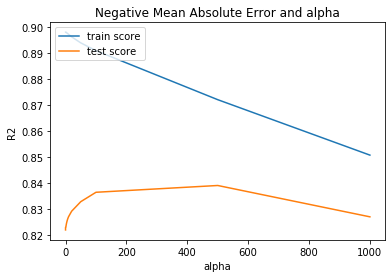

In [118]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [119]:
ridge_reg.best_params_

{'alpha': 500}

In [120]:
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-6.69788773e+02,  1.24118680e+03,  2.84185340e+03,  8.43182786e+03,
        3.42540981e+03,  4.17176996e+03,  5.04034086e+03, -7.15559605e+01,
        3.86975696e+03,  2.48024825e+03,  5.84178686e+03,  1.20410055e+03,
        3.43266112e+02,  5.91441961e+03,  1.03981632e+03,  9.26115067e+03,
        2.58520338e+03,  7.53546837e+02,  3.28660282e+03,  2.81271285e+03,
        1.19724396e+03, -1.27000287e+03,  4.73472769e+03,  3.50703021e+03,
        2.15663245e+03,  4.75965521e+03,  3.42815660e+02,  1.81225488e+03,
        1.04198151e+03,  3.96218611e+02,  5.02377167e+02,  2.08249217e+03,
       -1.69407098e+03, -2.05460266e+03,  6.33919860e+02,  5.92873988e+02,
       -1.44531458e+03, -7.06918830e+01,  4.62692984e+02, -3.61642148e+01,
       -6.80740907e+02,  1.12598046e+03,  2.90880421e+02,  5.62509543e+01,
        1.20542721e+03,  2.72129074e+02, -9.50263595e+02,  3.00999646e+02,
        6.28117820e+02, -7.89662305e+00, -1.17674966e+03,  2.55182056e+03,
       -2.26752614e+03, -

In [121]:
# predict
y_train_pred = ridge.predict(X_train)
print('R-squared on Training Dataset')
print(r2_score(y_true=y_train, y_pred=y_train_pred))
print('R-squared on Test dataset')
y_test_pred = ridge.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

R-squared on Training Dataset
0.8717178273655768
R-squared on Test dataset
0.8807545565426463


### For Ridge Regression for alpha -> 500
### Training Set R2 = 87%
### Test Set R2 = 88%
### No. of features = 117

### -------------------------------------------------------------------------

### Top Features that affect House Prices -(Based on Lasso Regression Model)

1. GrLivArea - Above ground living area square feet
2. OverallQual  - Overall Quality of House
3. Neighborhood_NridgHt - Houses near NridgHt area are expensive
4. TotalBsmtSF - Total Basement Surface Area
5. BsmtExposure_Gd - Houses with good Basement Exposure
6. ExterQual - Quality of exterior material
7. OverallCond 	- overall condition of House
8. GarageArea 	- Garage Surface area in square feet
9. BldgType_1Fam - Single-family Detached
10. Neighborhood_NoRidge - Neighborhood Northridge